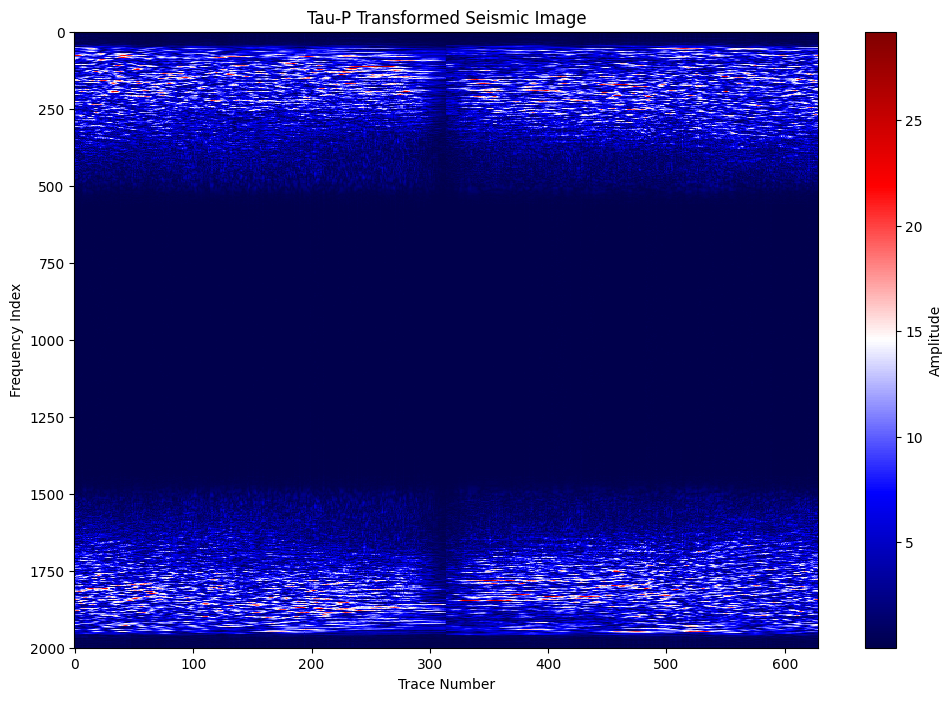

In [2]:
import segyio
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft, fftshift

# Open the SEGY file and read the data
with segyio.open('first.sgy', "r", ignore_geometry=True) as f:
    num_traces = len(f.trace)
    num_samples = len(f.trace[0])
    seismic_data = np.zeros((num_traces, num_samples))
    for i, trace in enumerate(f.trace):
        seismic_data[i, :] = trace

# Normalize the seismic data
seismic_data /= np.max(np.abs(seismic_data))

# Apply tau-p transformation
def taup_transform(data):
    num_traces, num_samples = data.shape
    taup_data = np.zeros_like(data, dtype=np.complex128)  # Use np.complex128 instead of np.complex
    for i in range(num_traces):
        taup_data[i, :] = fft(data[i, :])
    taup_data = fftshift(taup_data, axes=0)
    return np.abs(taup_data)

taup_data = taup_transform(seismic_data)

# Plot the tau-p transformed data
plt.figure(figsize=(12, 8))
plt.imshow(taup_data.T, aspect='auto', cmap='seismic', interpolation='none')
plt.colorbar(label='Amplitude')
plt.xlabel('Trace Number')
plt.ylabel('Frequency Index')
plt.title('Tau-P Transformed Seismic Image')
plt.show()
